🧪 Ejercicio práctico propuesto (nivel: básico)

📌 Enunciado: Clasificación de flores según ancho y largo del pétalo
Vas a usar un subconjunto del famoso dataset Iris para clasificar entre dos tipos de flores (setosa y versicolor) usando SVM.

🎯 Tareas a realizar:
1. Carga el dataset.

2. Codifica la columna Clase como 0 = setosa, 1 = versicolor.

3. Entrena un modelo SVC de Scikit-Learn con kernel lineal.

4. Evalúa la precisión del modelo en un conjunto de prueba.

5. Predice la clase de una flor con:

  * Largo_pétalo = 1.6

  * Ancho_pétalo = 0.3

6. (Opcional) Grafica los puntos y el hiperplano de separación si quieres visualizarlo.

Importar librerías

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

1. Carga el dataset.

In [ ]:
ds = pd.read_csv('SVM.csv')
ds.head()

,Largo_petalo,Ancho_petalo,Clase
0,1.4,0.2,setosa
1,1.3,0.2,setosa
2,1.5,0.2,setosa
3,1.4,0.3,setosa
4,1.7,0.4,setosa


2. Codifica la columna Clase como 0 = setosa, 1 = versicolor.

In [ ]:
ds['Clase'] = ds['Clase'].map({'setosa': 0, 'versicolor': 1})
ds.head()

,Largo_petalo,Ancho_petalo,Clase
0,1.4,0.2,0
1,1.3,0.2,0
2,1.5,0.2,0
3,1.4,0.3,0
4,1.7,0.4,0


3. Entrena un modelo SVC de Scikit-Learn con kernel lineal.

In [ ]:
model = SVC(kernel='linear')
x_train,x_test,y_train,y_test = train_test_split(ds[['Largo_petalo','Ancho_petalo']],ds['Clase'],test_size=0.2,random_state=42)
model.fit(x_train,y_train)

SVC(kernel='linear')

4. Evalúa la precisión del modelo en un conjunto de prueba.

In [ ]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 1.0


5. Predice la clase de una flor con:

  * Largo_pétalo = 1.6

  * Ancho_pétalo = 0.3

In [ ]:
flower = [[1.6,0.3]]
classPredicted = model.predict(flower)
label = {0:'setosa',1:'versicolor'}
print("La flor pertenece a la clase:",label[classPredicted[0]])


La flor pertenece a la clase: setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


6. (Opcional) Grafica los puntos y el hiperplano de separación si quieres visualizarlo.

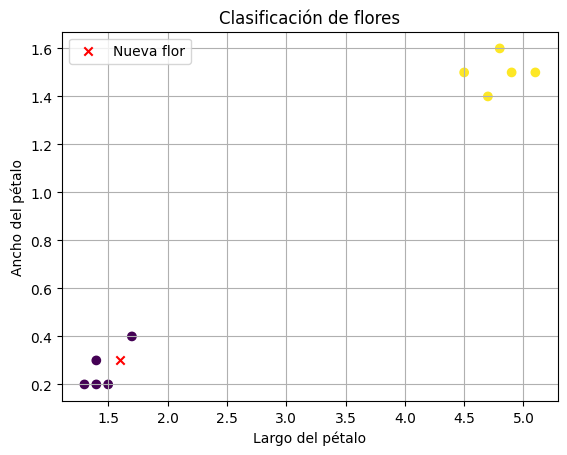

In [ ]:
plt.scatter(ds['Largo_petalo'], ds['Ancho_petalo'], c=ds['Clase'])
plt.scatter(flower[0][0], flower[0][1], c='red', marker='x', label='Nueva flor')
plt.legend()
plt.xlabel('Largo del pétalo')
plt.ylabel('Ancho del pétalo')
plt.title('Clasificación de flores')
plt.grid(True)
plt.show()

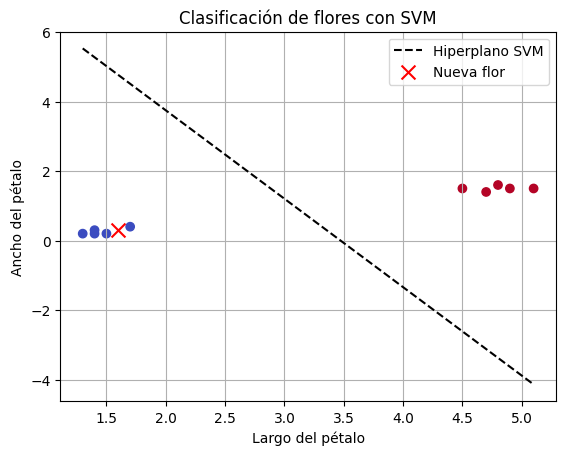

In [ ]:
w = model.coef_[0]
b = model.intercept_[0]

# Crear un rango de valores para el largo del pétalo (eje X)
x_vals = np.linspace(ds['Largo_petalo'].min(), ds['Largo_petalo'].max(), 100)

# Ecuación del hiperplano: w0*x + w1*y + b = 0  ⇒  y = -(w0*x + b)/w1
y_vals = -(w[0] * x_vals + b) / w[1]

# Gráfico
plt.scatter(ds['Largo_petalo'], ds['Ancho_petalo'], c=ds['Clase'], cmap='coolwarm')
plt.plot(x_vals, y_vals, 'k--', label='Hiperplano SVM')  # Línea separadora
plt.scatter(flower[0][0], flower[0][1], c='red', marker='x', s=100, label='Nueva flor')
plt.xlabel('Largo del pétalo')
plt.ylabel('Ancho del pétalo')
plt.title('Clasificación de flores con SVM')
plt.legend()
plt.grid(True)
plt.show()